In [1]:
import os
import glob
import re
import numpy as np

natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]


In [2]:
import soundfile as sf

In [10]:
rootdir = '/mnt/minerva'
srcdir = os.path.join(rootdir, 'ht-sound-chambers')

session = 20230915
acq_paths = glob.glob(os.path.join(srcdir, '{}*'.format(session)))
print(acq_paths)

figdir = os.path.join(srcdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)

['/mnt/minerva/ht-sound-chambers/20230915-141839_4V', '/mnt/minerva/ht-sound-chambers/20230915.md.txt', '/mnt/minerva/ht-sound-chambers/20230915-154156_16V', '/mnt/minerva/ht-sound-chambers/20230915-144414_8V', '/mnt/minerva/ht-sound-chambers/20230915-151209_12V']


In [11]:
acq_names = [os.path.split(acq)[-1] for acq in acq_paths if not acq.endswith('txt')]
acq_names

['20230915-141839_4V',
 '20230915-154156_16V',
 '20230915-144414_8V',
 '20230915-151209_12V']

In [12]:
import pylab as pl

In [13]:
%matplotlib notebook

In [14]:
srcdir

'/mnt/minerva/ht-sound-chambers'

In [15]:
#acq = '20230914-151111_10V'
# wavfiles = sorted(glob.glob(os.path.join('/mnt/minerva/ht-sound-chambers/{}'.format(acq), '*.WAV')),
#                   key=natsort)
# for i, v in enumerate(wavfiles):
#     print(i, v)

<IPython.core.display.Javascript object>


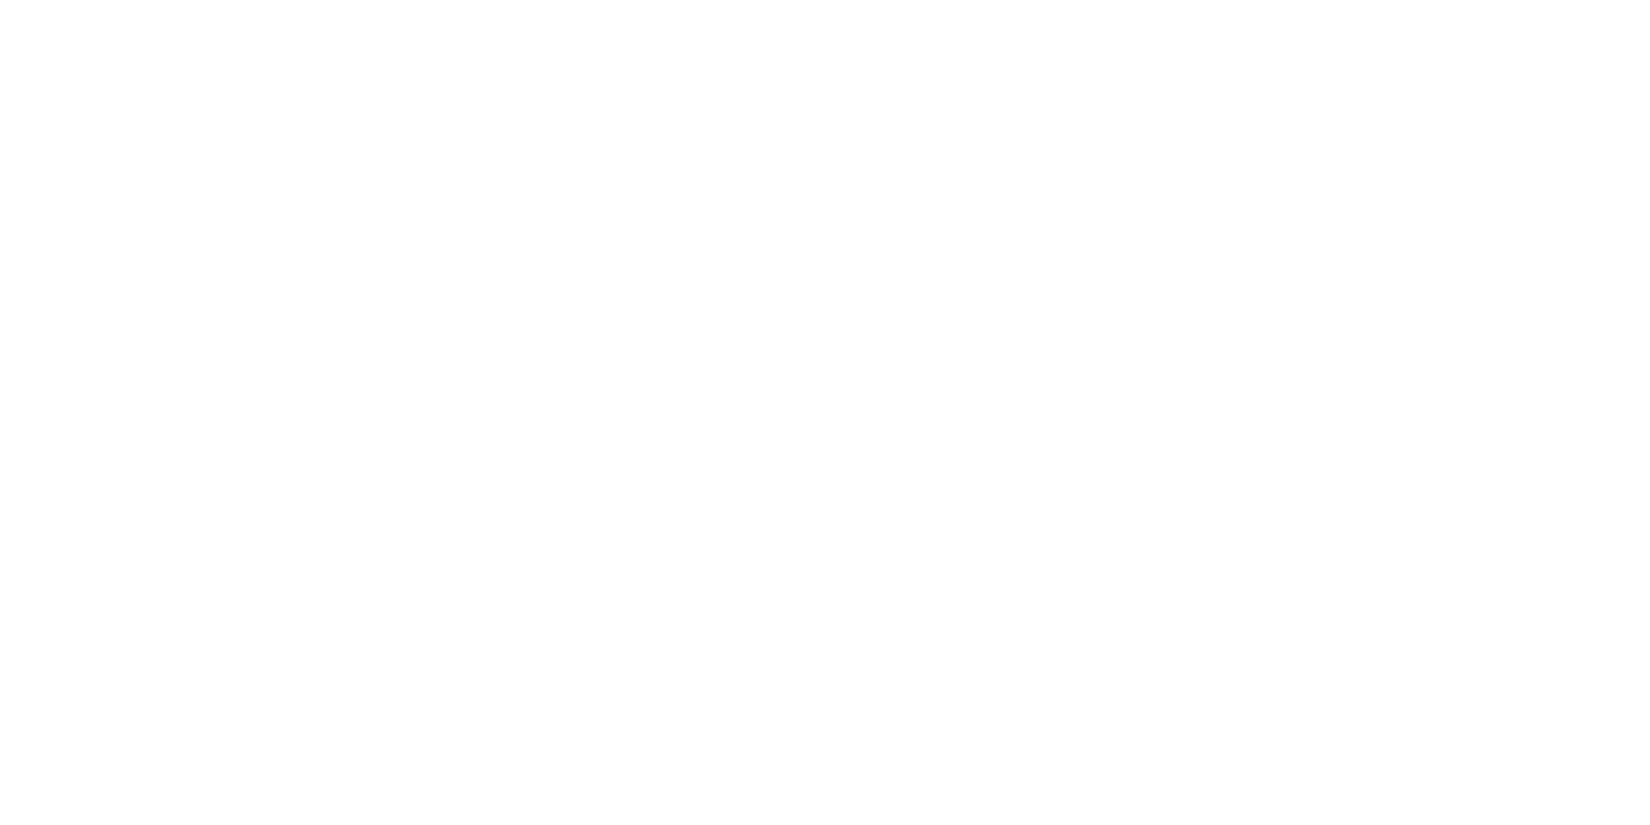

<IPython.core.display.Javascript object>


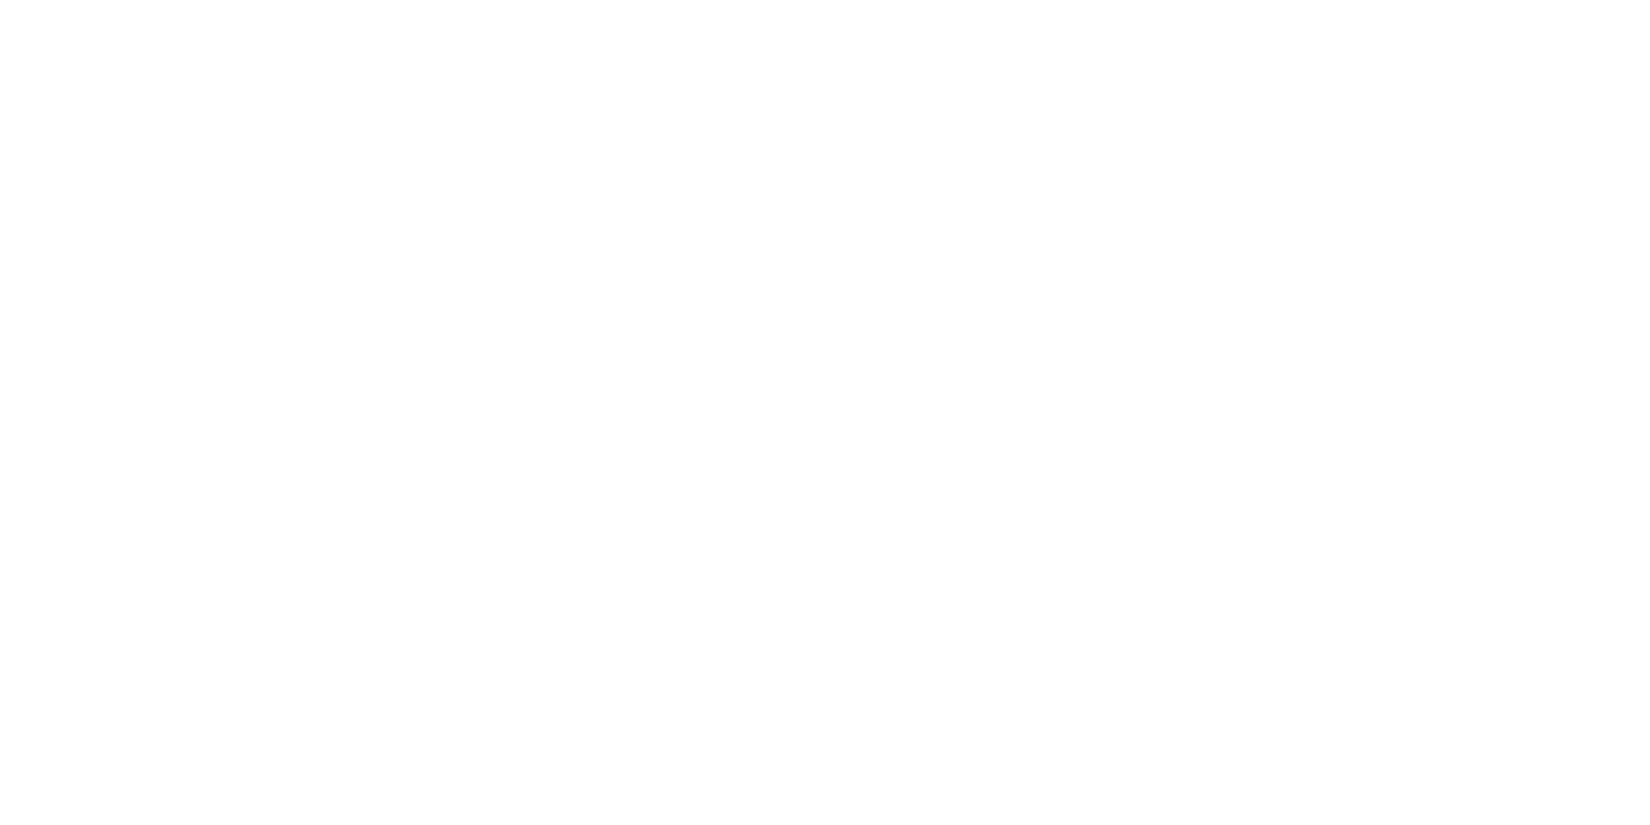

<IPython.core.display.Javascript object>


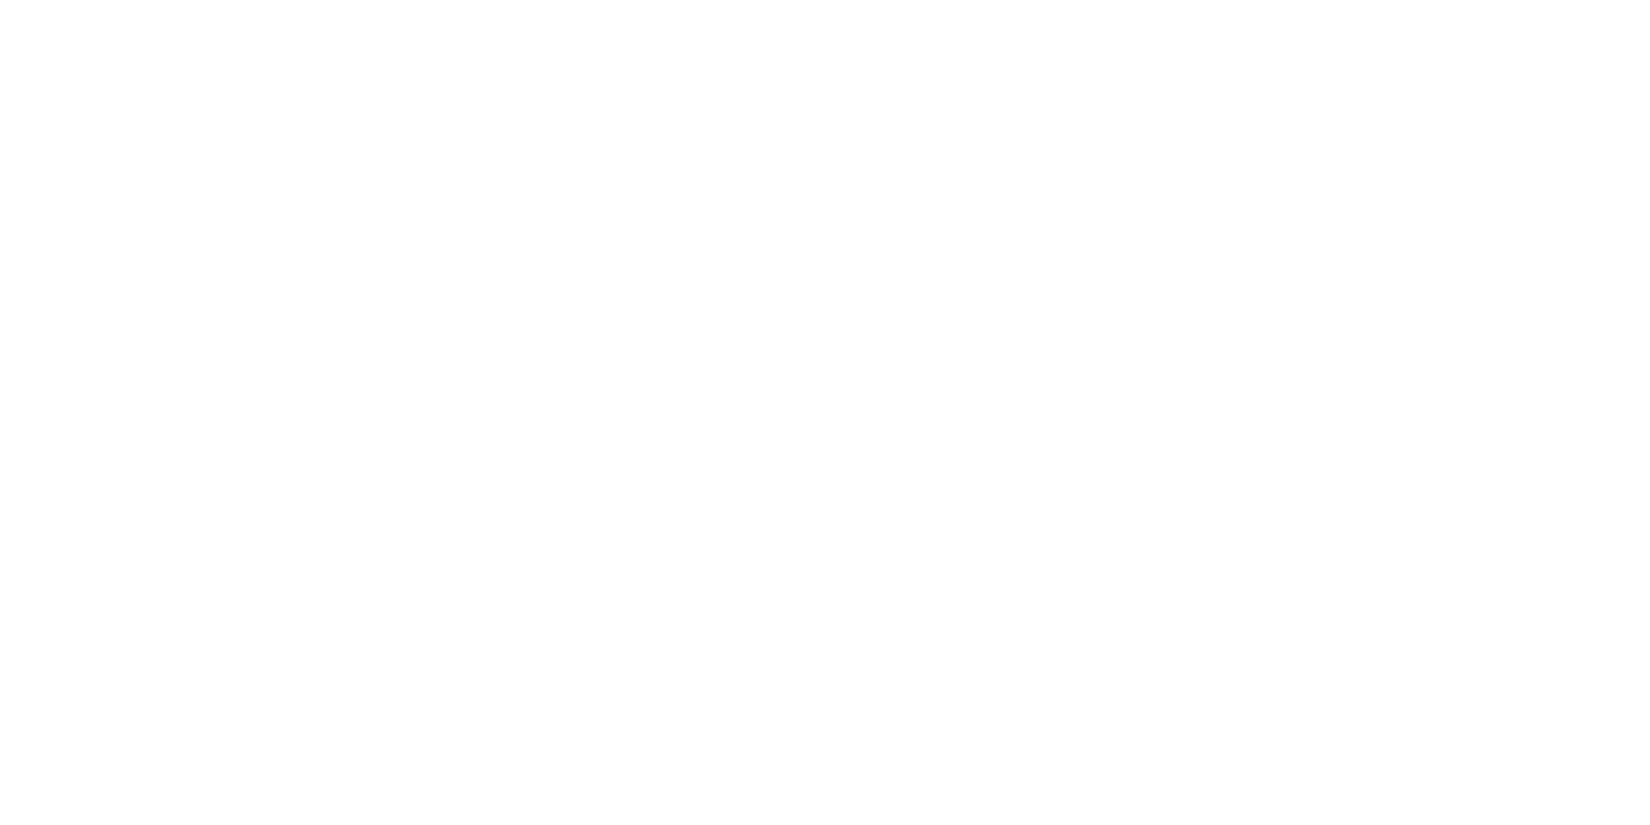

<IPython.core.display.Javascript object>


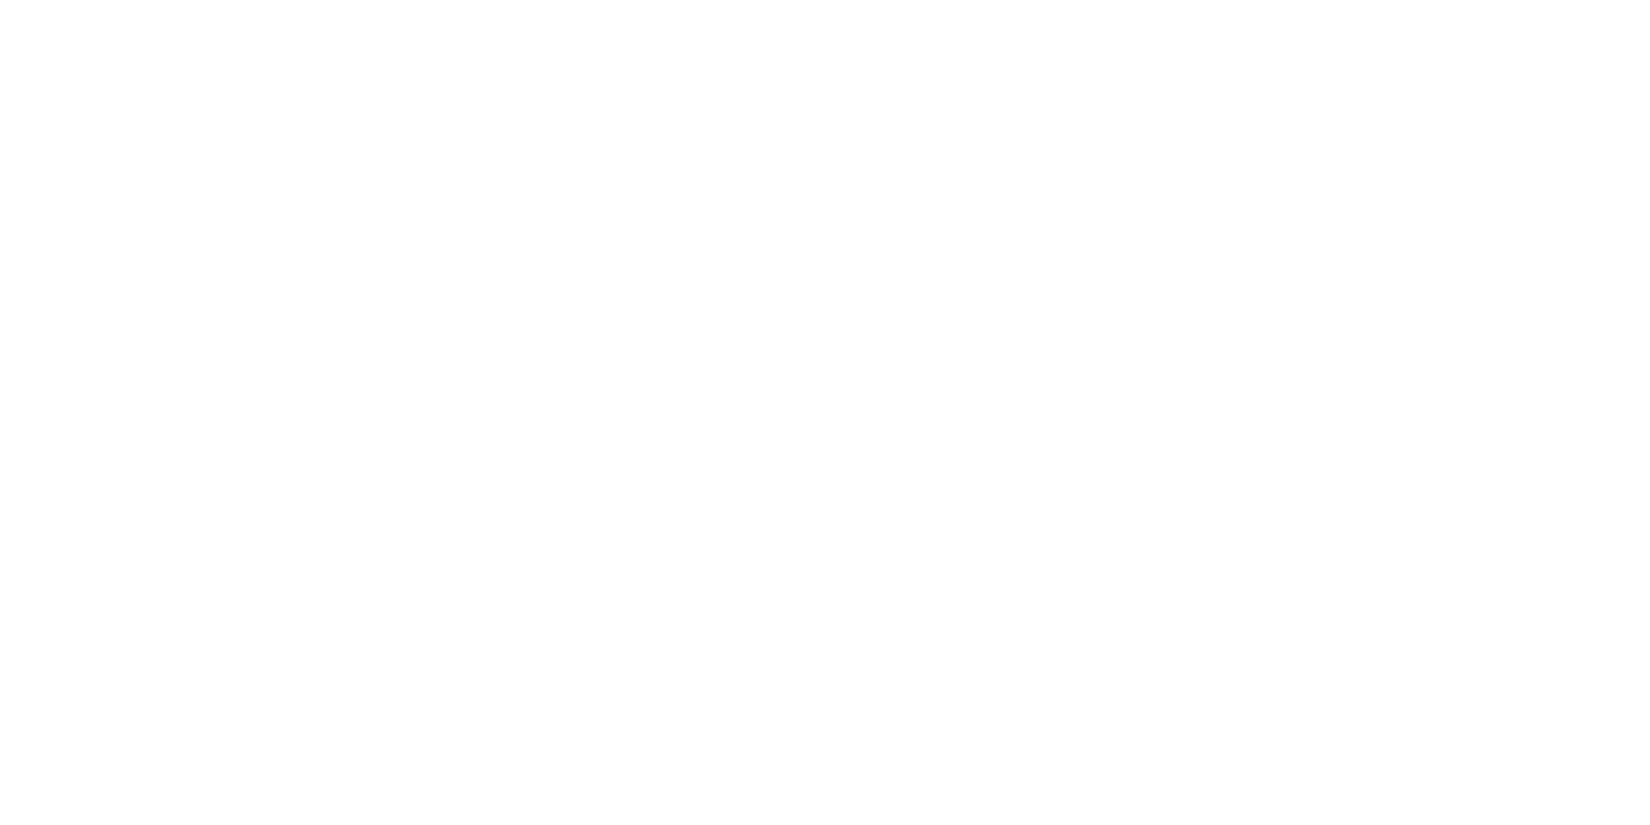

In [16]:
for acq in acq_names:
    wavfiles = sorted(glob.glob(os.path.join('/mnt/minerva/ht-sound-chambers/{}'.format(acq), '*.WAV')),
                      key=natsort)
    fig, axn = pl.subplots(3, 8, sharex=True, sharey=True, figsize=(12,6))
    for ai, fp in enumerate(wavfiles[0:24]):
        data, samplerate = sf.read(fp)
        secs = np.linspace(0, 600, len(data))
        ax=axn.flat[ai]
        ax.plot(secs, data, 'k', lw=0.5)
        ax.axvspan(xmin=120, xmax=130, facecolor='r', alpha=0.5)
        ax.set_title(os.path.splitext(os.path.split(fp)[-1])[0], fontsize=4)

    fig.text(0.1, 0.9, acq, fontsize=6)
    pl.savefig(os.path.join(figdir, '{}.png'.format(acq)))
    pl.close()

In [25]:
data, samplerate = sf.read(wavfiles[10])
print(data.shape)
print(samplerate)

(3000000,)
5000


<IPython.core.display.Javascript object>


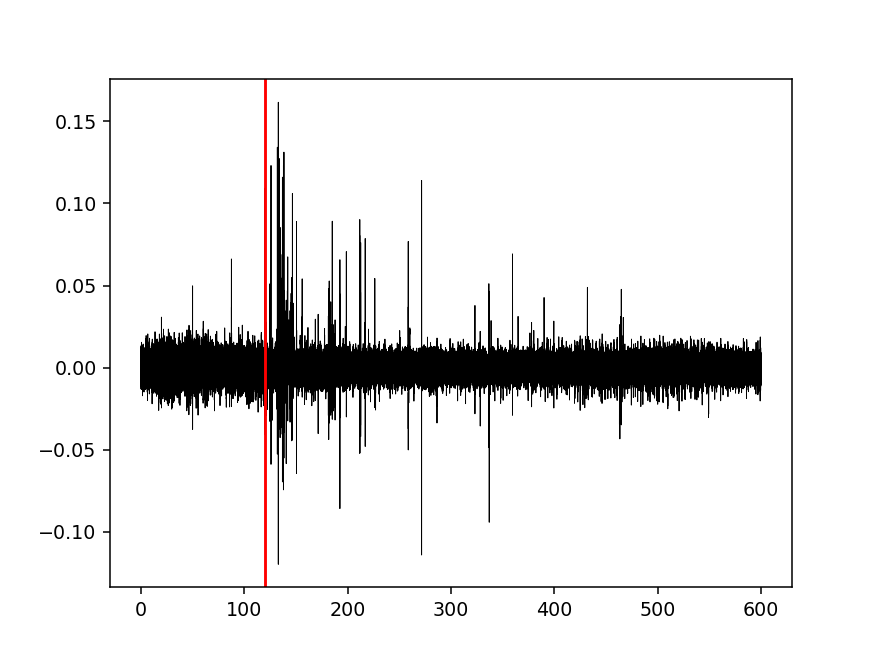

NameError: name 'fp' is not defined

In [28]:
fig, ax = pl.subplots()
ax.plot(secs, data, 'k', lw=0.5)
ax.axvline(x=120, color='r')
ax.set_title(fp)

In [12]:
data

array([0.00424194, 0.00402832, 0.00369263, ..., 0.00863647, 0.00793457,
       0.00872803])